In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


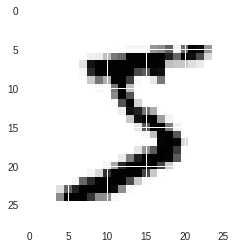

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1), border_mode='same'))
model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 5, 5, 10)          170       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 1, 1, 10)          2510      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [0]:
# model.fit(X_train, Y_train, batch_size=8192, nb_epoch=50, verbose=1)


model.fit_generator(train_generator, steps_per_epoch=60000//512, epochs=30, 
                    validation_data=test_generator, validation_steps=10000//512)

Epoch 1/30
117/117 [==============================] - 2s 21ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0185 - val_acc: 0.9967
Epoch 2/30
117/117 [==============================] - 3s 27ms/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0221 - val_acc: 0.9918
Epoch 3/30
117/117 [==============================] - 3s 27ms/step - loss: 0.0316 - acc: 0.9896 - val_loss: 0.0198 - val_acc: 0.9910
Epoch 4/30
117/117 [==============================] - 3s 27ms/step - loss: 0.0357 - acc: 0.9884 - val_loss: 0.0281 - val_acc: 0.9934
Epoch 5/30
117/117 [==============================] - 3s 28ms/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0353 - val_acc: 0.9901
Epoch 6/30
117/117 [==============================] - 3s 27ms/step - loss: 0.0421 - acc: 0.9862 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 7/30
117/117 [==============================] - 3s 27ms/step - loss: 0.0339 - acc: 0.9889 - val_loss: 0.0321 - val_acc: 0.9885
Epoch 8/30
117/117 [==============================] - 3s 27ms/step - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0209834477995988, 0.9933]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.3265484e-11 1.2332599e-10 6.0237659e-07 7.6177527e-09 4.4916131e-14
  2.3835439e-11 1.5232292e-15 9.9999893e-01 4.3272226e-09 4.8290462e-07]
 [1.6310563e-07 6.9885800e-07 9.9997747e-01 1.7374567e-05 8.5840819e-09
  1.1445616e-11 2.2831694e-06 7.4528792e-08 1.7773203e-06 9.5162449e-08]
 [4.6697122e-09 9.9995291e-01 3.3381684e-07 3.4475690e-08 3.6001526e-05
  1.0313327e-06 1.4719702e-06 2.6812643e-06 1.3276392e-07 5.3211193e-06]
 [9.9987161e-01 1.0870575e-15 2.8380107e-08 2.2474740e-10 6.7513628e-10
  5.3711568e-07 7.1917559e-05 3.1681272e-11 5.0936815e-05 4.9957921e-06]
 [8.9640006e-14 2.5778274e-11 1.1423680e-09 1.8015444e-14 9.9999976e-01
  2.0744361e-13 5.8285104e-12 1.8411539e-09 2.2359174e-10 2.2729147e-07]
 [8.6253031e-09 9.9989665e-01 2.6548821e-07 3.8651811e-11 9.3440278e-05
  1.0201817e-08 1.4504201e-06 7.6351807e-06 2.4751923e-08 5.7942736e-07]
 [3.3116364e-11 5.7585231e-10 5.8560879e-08 5.9988012e-13 9.9999177e-01
  1.2302892e-09 7.5053991e-11 1.9248271e-11 4.3011337e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_10': <keras.layers.core.Activation at 0x7f81c78b7208>,
 'conv2d_53': <keras.layers.convolutional.Conv2D at 0x7f81c81d2438>,
 'conv2d_54': <keras.layers.convolutional.Conv2D at 0x7f81c81d2dd8>,
 'conv2d_55': <keras.layers.convolutional.Conv2D at 0x7f81c81d2b38>,
 'conv2d_56': <keras.layers.convolutional.Conv2D at 0x7f81c81d22e8>,
 'conv2d_57': <keras.layers.convolutional.Conv2D at 0x7f81c78f9198>,
 'flatten_10': <keras.layers.core.Flatten at 0x7f81c7909c50>,
 'max_pooling2d_20': <keras.layers.pooling.MaxPooling2D at 0x7f81c7dad358>,
 'max_pooling2d_21': <keras.layers.pooling.MaxPooling2D at 0x7f81c78f9518>}

conv2d_53


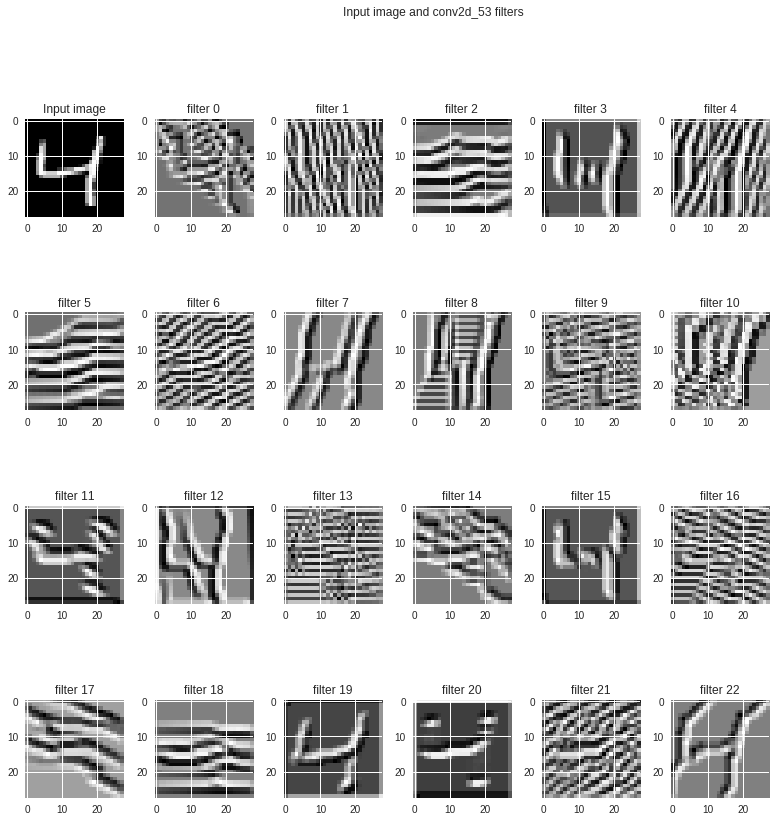

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_53'):
    print(layer_name)
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])
        

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()